## Exploring Data




### Obtain Access to GeoDB

In [1]:
from dcfs_geodb.core.geodb import GeoDBClient

In [2]:
geodb = GeoDBClient()
geodb.whoami

'anja'

### List Datasets

__Step 1__: List my datasets.

In [3]:
geodb.get_collections()

,table_name
0,land_use3
1,land_use


__Step 2__: Let's get the whole dataset content.

In [5]:
gdf = geodb.get_collection('land_use')
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,4,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((455929.405 97963.785, 455933.284 979...",2305596,1100,2019-02-25
2,5,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((461561.512 96119.256, 461632.114 960...",2310160,1100,2019-03-11
3,6,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((458139.092 95583.227, 458136.249 955...",3602865,1500,2019-01-05
4,7,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((458123.067 95461.892, 458123.413 954...",3602883,1500,2019-01-05
...,...,...,...,...,...,...,...
9438,9765,2020-01-29T08:21:05.562829+00:00,2020-01-29T08:21:19.996576+00:00,"POLYGON ((458304.555 100146.103, 458306.726 10...",6268058,1300,2000-01-01
9439,9766,2020-01-29T08:21:05.562829+00:00,2020-01-29T08:21:19.996576+00:00,"POLYGON ((458247.583 99746.065, 458245.202 997...",6268059,1300,2000-01-01
9440,9767,2020-01-29T08:21:05.562829+00:00,2020-01-29T08:21:19.996576+00:00,"POLYGON ((461932.283 90520.703, 461931.619 905...",6263561,1300,2000-01-01
9441,9798,2020-01-29T08:21:05.562829+00:00,2020-01-29T08:21:19.996576+00:00,"POLYGON ((457231.170 90902.256, 457234.861 909...",6264862,1300,2000-01-01


__Step 3__: Plot the GeoDataframe

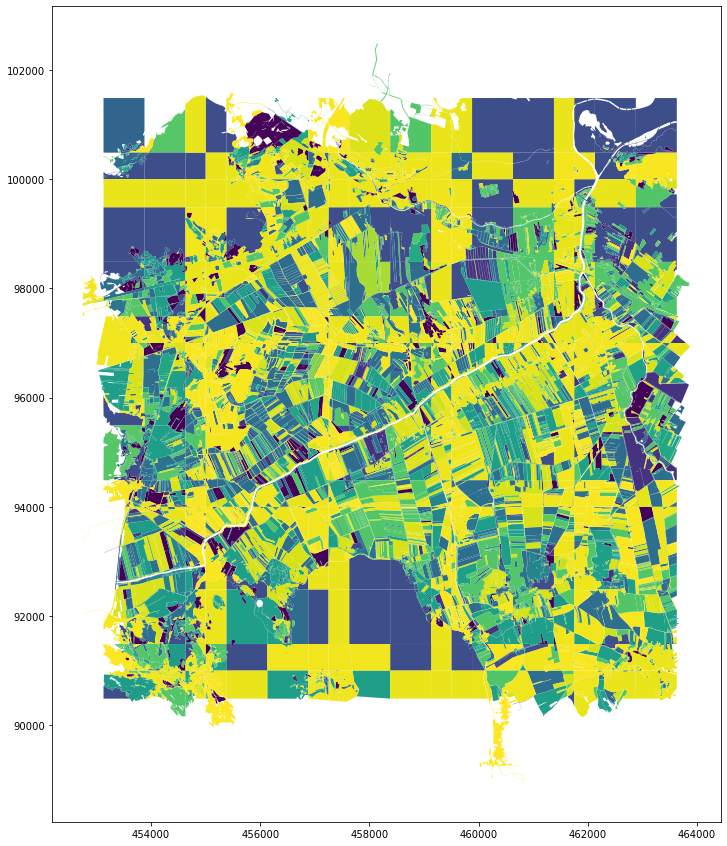

In [35]:
gdf.plot(column="raba_pid", figsize=(15,15))

__Step 5__: Subselect the data. Here: Select a specific use

In [6]:
gdfsub = geodb.get_collection('land_use', query='raba_id=eq.1410')
gdfsub.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,62,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((457261.001 96349.254, 457256.831 963...",3596498,1410,2019-01-05
2,22,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((455384.809 97907.054, 455380.659 979...",3616776,1410,2019-02-25
3,28,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((462585.734 93088.987, 462567.020 930...",3826126,1410,2019-01-23
4,32,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((457748.827 96167.354, 457748.394 961...",2309744,1410,2019-01-05


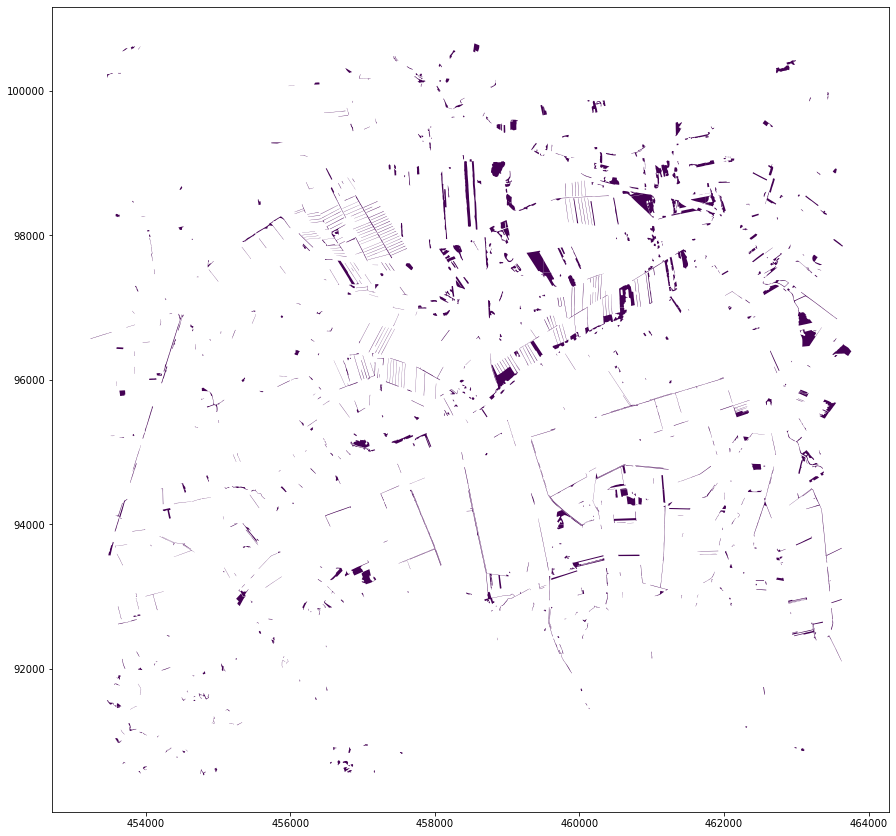

In [7]:
gdfsub.plot(column="raba_id", figsize=(15,15))

__Step 6__: Filter by bbox

In [23]:
gdf = geodb.get_collection_by_bbox(collection="land_use", bbox=(452750.0, 464000.0, 88909.549, 102486.299),
                           comparison_mode="contains", bbox_crs=3794, limit=200, offset=10)
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,12,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((453673.609 91328.224, 453678.929 913...",5983074,1600,2019-03-26
1,13,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((460312.295 96127.114, 460300.319 961...",5983199,1600,2019-03-11
2,14,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((460459.445 96117.356, 460470.516 961...",5983217,1100,2019-03-11
3,15,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((457798.753 99628.982, 457783.076 996...",6299143,1600,2019-03-04
4,16,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((461439.703 92137.401, 461436.166 921...",4643632,1600,2019-02-21
...,...,...,...,...,...,...,...
195,215,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((458934.146 95656.658, 458932.345 956...",5966575,1222,2019-01-05
196,216,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((458934.146 95656.658, 458935.525 956...",5966577,1100,2019-01-05
197,217,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((455301.879 91279.877, 455302.373 912...",2594677,1100,2019-03-14
198,218,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((455207.927 91222.221, 455193.596 912...",2594678,1100,2019-03-14


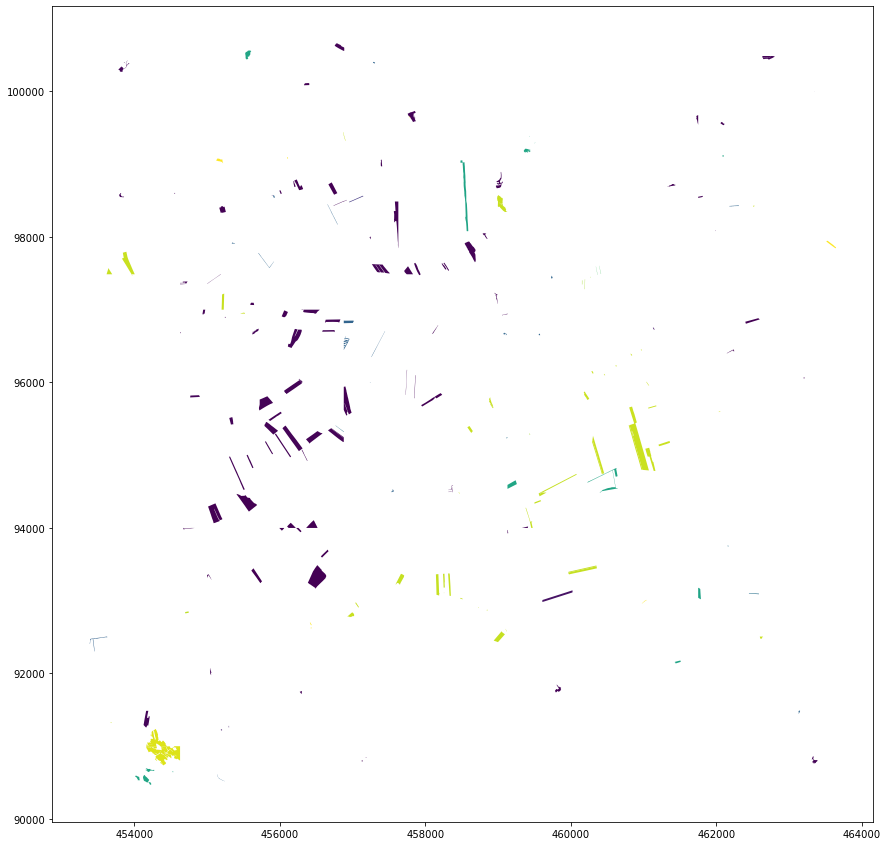

In [24]:
gdf.plot(column="raba_pid", figsize=(15,15))

__Step 6__: Fltering using PostGres Syntax

In [15]:
gdf = geodb.get_collection_pg(collection='land_use', where='raba_id=1410')
gdf.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,62,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((457261.001 96349.254, 457256.831 963...",3596498,1410,2019-01-05
2,22,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((455384.809 97907.054, 455380.659 979...",3616776,1410,2019-02-25
3,28,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((462585.734 93088.987, 462567.020 930...",3826126,1410,2019-01-23
4,32,2020-01-29T08:21:05.562829+00:00,None,"POLYGON ((457748.827 96167.354, 457748.394 961...",2309744,1410,2019-01-05


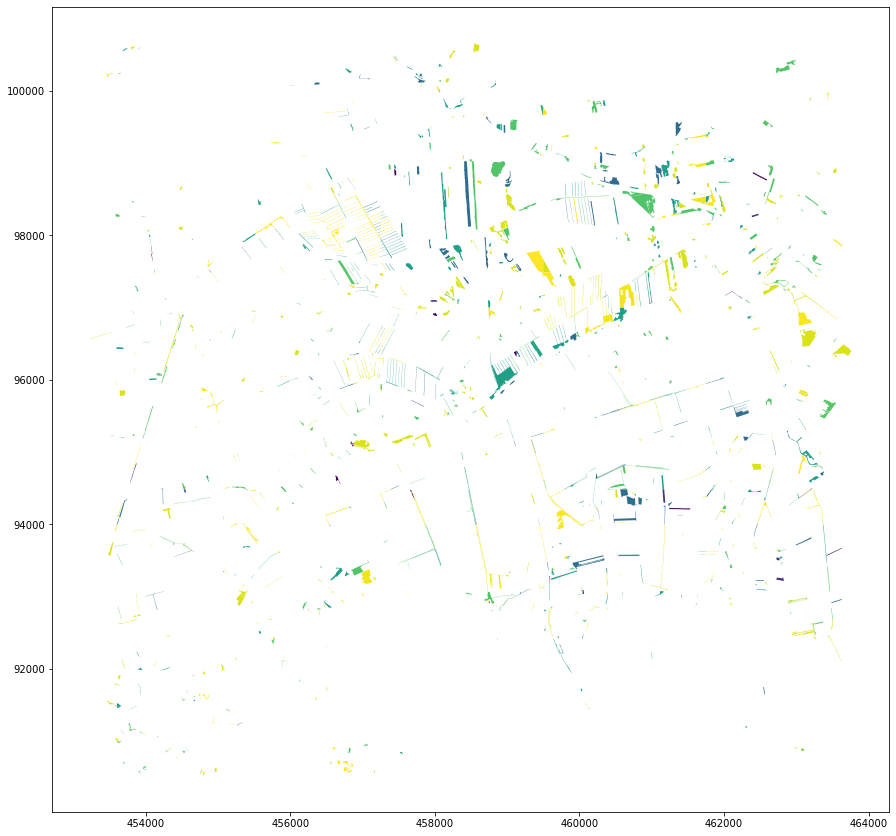

In [16]:
gdf.plot(column="raba_pid", figsize=(15,15))

__Step 7__: Fltering using PostGres Syntax Allowing Aggregation

In [18]:
df = geodb.get_collection_pg('land_use', where='raba_id=1410', group='d_od', select='COUNT(d_od) as ct, d_od')
df.head()

,ct,d_od
0,12,2019-03-21
1,47,2019-02-25
2,17,2019-03-13
3,26,2019-02-20
4,2,2019-04-29
